In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append(r'C:\\N-20KEPC0Y7KFA-Data\\junhuawa\\Documents\\00-Play-with-ML-in-Python\\Jupyter')
from playML.metrics import TPR
from playML.metrics import FPR

from sklearn.datasets import load_digits
X = load_digits().data
y = load_digits().target
y = np.array( y == 9, dtype='int')
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)
log_reg.fit(X_train, y_train)
#y_predict = log_reg.predict(X_test)
decision_scores = log_reg.decision_function(X_test)

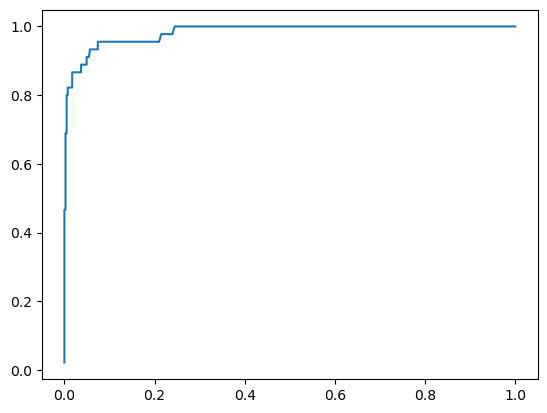

In [2]:
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
tprs = []
fprs = []
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))
	
plt.plot(fprs, tprs)


In [5]:
y_predict = log_reg.predict(X_test)

In [8]:
from playML.metrics import F1_Score

In [9]:
F1_Score(y_test, y_predict)

0.8674698795180724

### Sklearn 中的ROC曲线


In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, decision_scores)
plt.plot(fpr, tpr)
plt.title("ROC curve ")
plt.xlabel("FPR(false positive rate")
plt.ylabel("TPR(true positive rate)")

In [ ]:
from sklearn.metrics import roc_auc_score# 求ROC曲线下的面积

In [ ]:
roc_auc_score?

In [ ]:
roc_auc_score(y_test, decision_scores)